<a href="https://colab.research.google.com/github/Parag-13/Bank-Data-Analysis-implementing-Decision-Tree-Classifier/blob/main/Bank_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [4]:
# loading the Bank-Data dataset to a pandas dataframe
bank_data = pd.read_csv('/content/bank-data.csv')

In [5]:
#printing the first 5 rows of the dataset
bank_data.head()

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
1,ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
2,ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
3,ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
4,ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           600 non-null    object 
 1   age          600 non-null    int64  
 2   sex          600 non-null    object 
 3   region       600 non-null    object 
 4   income       600 non-null    float64
 5   married      600 non-null    object 
 6   children     600 non-null    int64  
 7   car          600 non-null    object 
 8   save_act     600 non-null    object 
 9   current_act  600 non-null    object 
 10  mortgage     600 non-null    object 
 11  pep          600 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 56.4+ KB


In [12]:
convert = {"sex": {"MALE": 1, "FEMALE": 0},
           "region": {"INNER_CITY": 0, "TOWN": 1, "RURAL": 2, "SUBURBAN": 3},
           "married": {"YES": 1, "NO": 0},
           "car": {"YES": 1, "NO": 0},
           "save_act": {"YES": 1, "NO": 0},
           "current_act": {"YES": 1, "NO": 0},
           "mortgage": {"YES": 1, "NO": 0}}

In [13]:
bank_data = bank_data.replace(convert)

In [14]:
bank_data

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,ID12101,48,0,0,17546.00,0,1,0,0,0,0,YES
1,ID12102,40,1,1,30085.10,1,3,1,0,1,1,NO
2,ID12103,51,0,0,16575.40,1,0,1,1,1,0,NO
3,ID12104,23,0,1,20375.40,1,3,0,0,1,0,NO
4,ID12105,57,0,2,50576.30,1,0,0,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,0,0,47025.00,0,2,1,1,1,1,NO
596,ID12697,30,0,0,9672.25,1,0,1,1,1,0,NO
597,ID12698,31,0,1,15976.30,1,0,1,1,0,0,YES
598,ID12699,29,1,0,14711.80,1,0,0,1,0,1,NO


In [15]:
X = ['age', 'sex', 'region', 'income', 'married', 'children', 'car', 'save_act', 'current_act', 'mortgage']
Y = ['YES', 'NO']
all_inputs = bank_data[X]
all_classes = bank_data['pep']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=2)

In [20]:
clf = DecisionTreeClassifier()

In [22]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [23]:
score = clf.score(X_test, Y_test)
print(score)

0.8111111111111111


In [24]:
Y_pred = clf.predict(X_test)

In [25]:
from sklearn.tree import plot_tree

[Text(0.6365234375, 0.9583333333333334, 'x[3] <= 29708.05\ngini = 0.496\nsamples = 420\nvalue = [229, 191]'),
 Text(0.452734375, 0.875, 'x[5] <= 1.5\ngini = 0.464\nsamples = 265\nvalue = [168, 97]'),
 Text(0.28671875, 0.7916666666666666, 'x[5] <= 0.5\ngini = 0.5\nsamples = 178\nvalue = [88, 90]'),
 Text(0.1421875, 0.7083333333333334, 'x[4] <= 0.5\ngini = 0.473\nsamples = 120\nvalue = [74, 46]'),
 Text(0.05, 0.625, 'x[9] <= 0.5\ngini = 0.426\nsamples = 39\nvalue = [12, 27]'),
 Text(0.025, 0.5416666666666666, 'x[0] <= 35.5\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(0.0125, 0.4583333333333333, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.0375, 0.4583333333333333, 'x[0] <= 42.0\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.025, 0.375, 'x[2] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.0125, 0.2916666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.0375, 0.2916666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05, 0.37

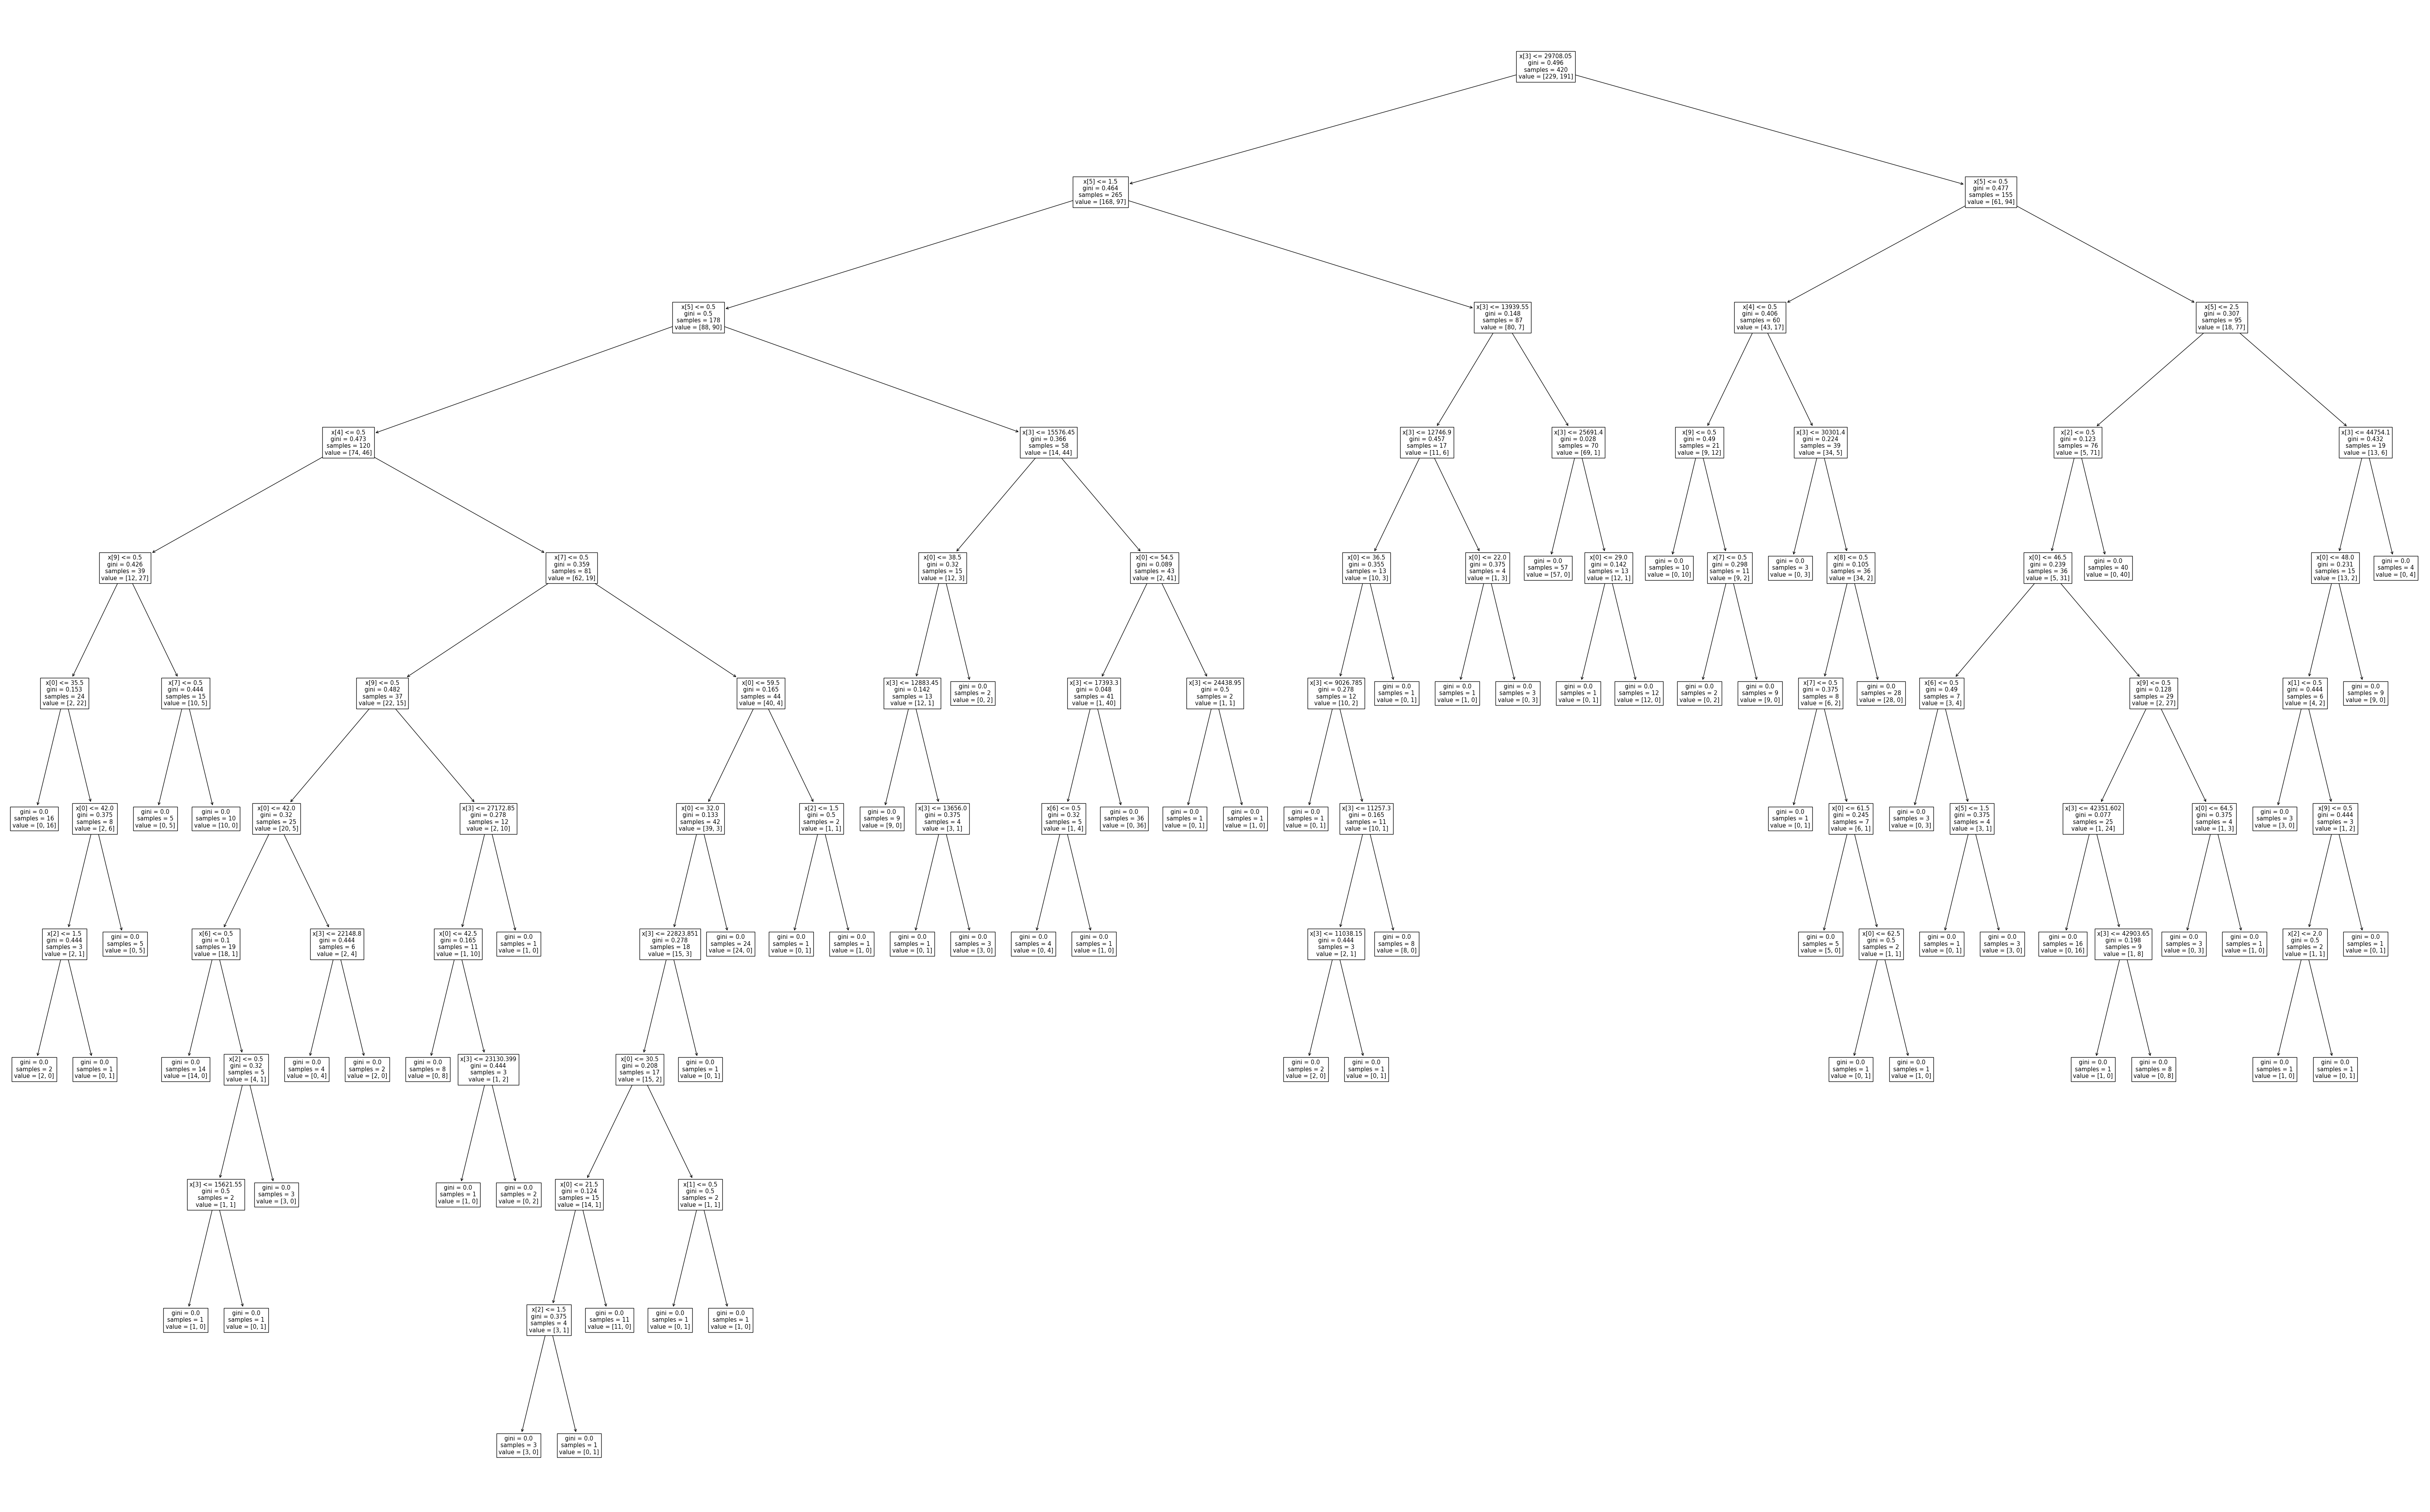

In [26]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50

plot_tree(clf)